Situasi
Bayangkan anda sekarang bekerja di divisi pendidikan tinggi Amerika Serikat. Anda 
mendapatkan dataset berisikan statistik dari setiap universitas yang ada di AS. Anda diminta 
untuk mengelompokkan universitas-universitas ini berdasarkan data, maka dari itu anda 
memutuskan untuk melakukan clustering. Hasil analisis anda akan sangat berguna bukan 
hanya bagi pemerintah, namun bagi masyarakat yang menginginkan informasi tentang 
perkuliahan. (Nama dataset: College.csv)

Misi

● Lakukan analisis clustering menggunakan lebih dari satu metode (bebas memilih 
antara K-means, Hierarchical, PCA, atau yang lebih advanced). 

● Berikan penjelasan singkat mengenai tiap kode atau tiap analisis yang dilakukan 
dengan markdown Jupyter Notebook.

● Lakukan seluruh proses dari data preprocessing sampai ke evaluasi clustering. 

● Dimohon untuk tidak menghapus baris data apapun, walaupun terdeteksi sebagai 
outliers, karena tujuan kita adalah agar seluruh universitas bisa dicluster sesuai 
dengan karakteristik mereka masing-masing. 

● Sangat dibolehkan jika ingin menggunakan pilihan model yang belum pernah kita 
bahas sebelumnya, namun wajib menyertakan penjelasan yang rinci dengan 
markdown tentang bagaimana model/teknik tersebut bekerja.

● Kumpulkan code beserta penjelasan dalam format .ipynb


## Import Dataset 

In [74]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('ggplot')

In [75]:
df = pd.read_csv('College.csv')
df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [77]:
df.describe()
#mencari nilai mean, std, min, max dari tiap variabel

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Check Missing Value

In [78]:
df.duplicated().any() #check dupilicate value on dataset

False

In [79]:
df.isnull() #check missing value

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
773,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
774,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
775,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df.isna().sum() #melihat jumlah missing value pada tiap variabel

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [81]:
nama_kolom = list(df.columns)

for kolom in nama_kolom:
    df.loc[df[kolom]=='?', kolom] = np.nan

mengganti tanda '?' menjadi NaN (bila ada)

In [82]:
def missing_data(df):    
    df_miss = pd.DataFrame(df.isnull().sum()).reset_index()
    df_miss.columns = ['column', 'count']
    df_miss = df_miss.loc[df_miss['count']!=0]
    df_miss['percent'] = round(df_miss['count']/df.shape[0]*100, 2)
    tipe_data = []
    contoh_data = []
    for kolom in list(df_miss['column']):
        tipe_data.append(df[kolom].dtype)
        contoh_data.append(df[kolom][100])
    df_miss['DataType'] = tipe_data
    df_miss['Example'] = contoh_data
    return df_miss

In [83]:
missing_data(df)

,column,count,percent,DataType,Example


## Check Outlier

<AxesSubplot:>

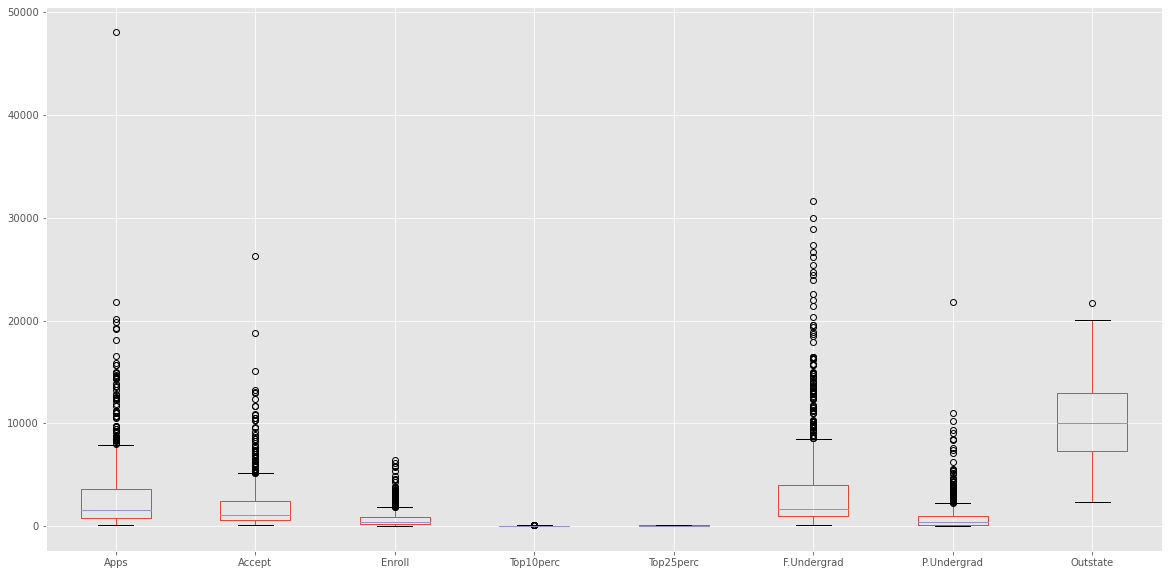

In [84]:
plt.figure(figsize = (20, 10))
df[['Apps'  , 'Accept' , 'Enroll' , 'Top10perc' , 'Top25perc'   , 'F.Undergrad'  , 'P.Undergrad' , 'Outstate']].boxplot()

<AxesSubplot:>

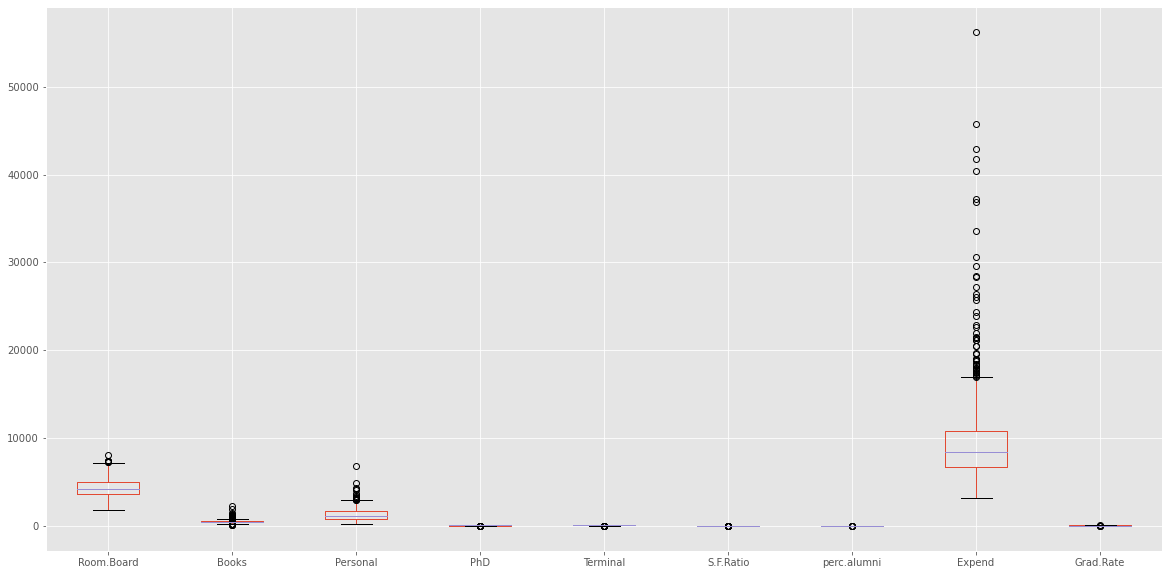

In [85]:
plt.figure(figsize = (20, 10))
df[['Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']].boxplot()

## Visualization

In [86]:
# show all numeric (float and int) variables in the dataset
df_numeric = df.select_dtypes(include=['float64', 'int'])
df_numeric.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [87]:
# correlation matrix antar 2 variabel dalam angka
df_cor = df_numeric.corr()
df_cor

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


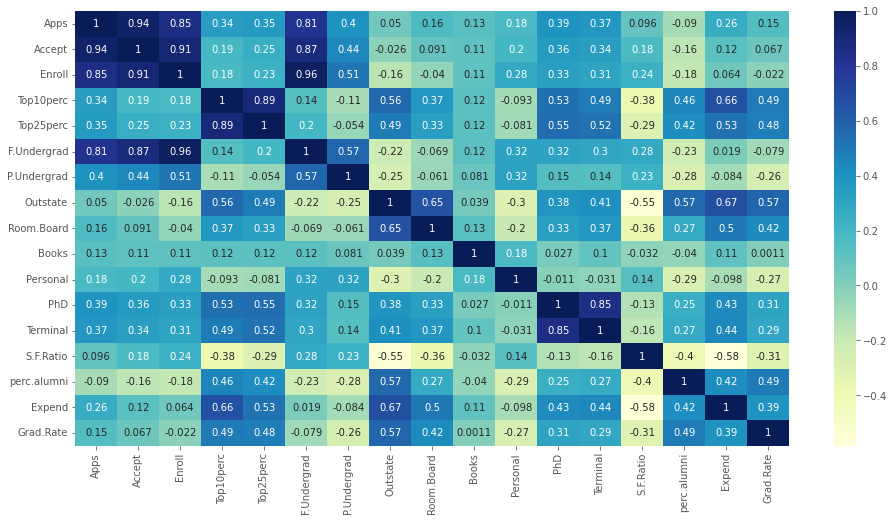

In [88]:
# heatmap visualization ( skala korelasi antara 2 variabel)

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_cor, cmap="YlGnBu", annot=True)
plt.show()

D:\Program DS\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


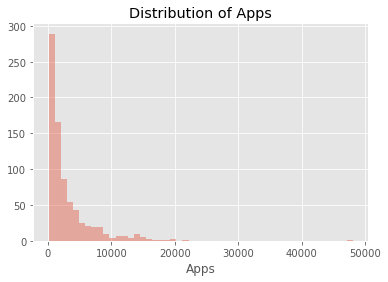

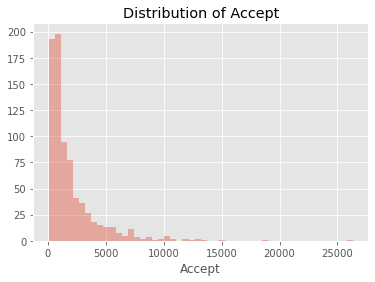

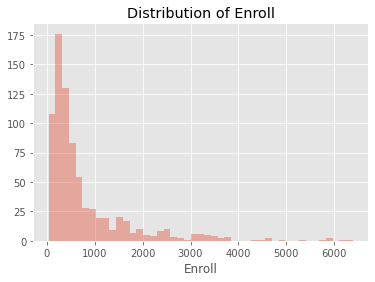

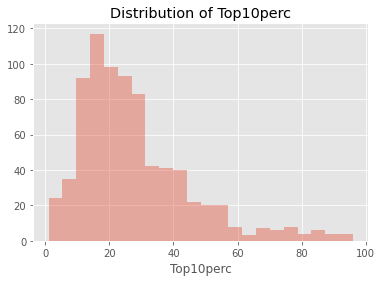

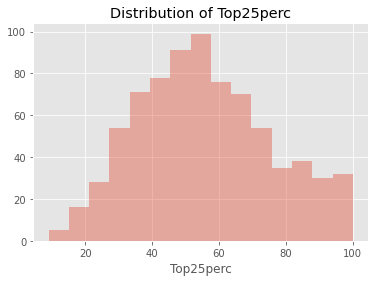

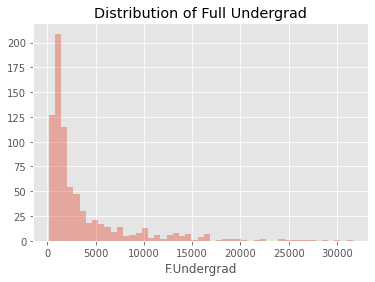

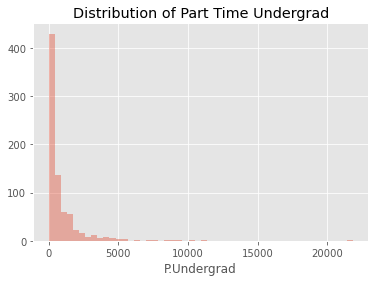

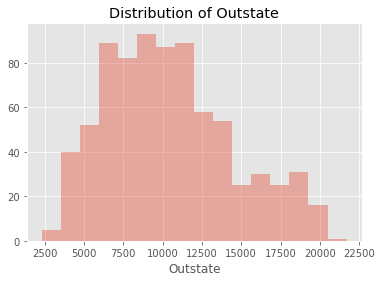

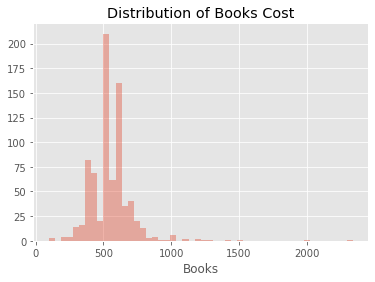

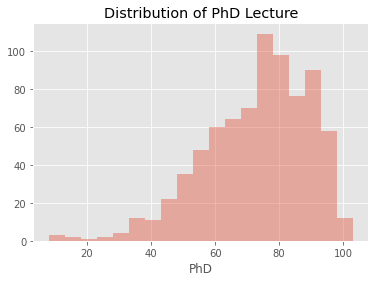

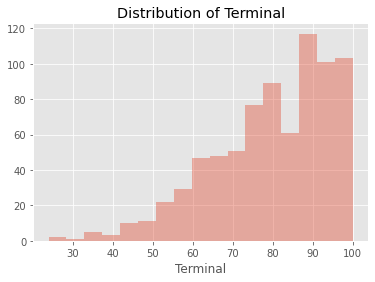

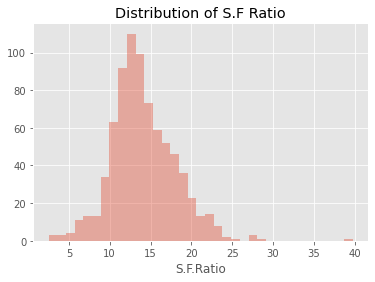

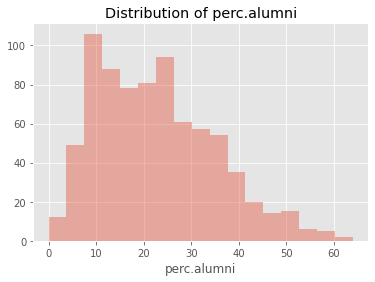

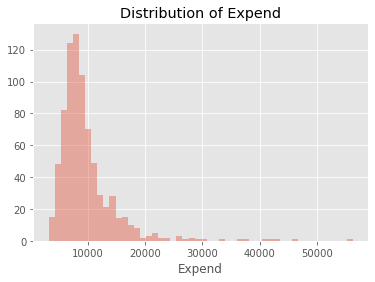

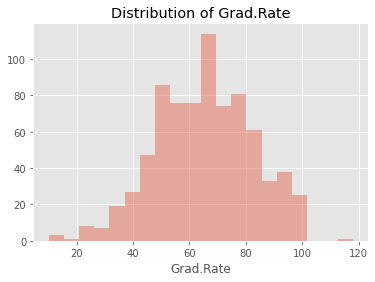

In [89]:
fig = sns.distplot(df['Apps'], kde = False)
plt.title('Distribution of Apps')
plt.show()

fig = sns.distplot(df['Accept'], kde = False)
plt.title('Distribution of Accept')
plt.show()

fig = sns.distplot(df['Enroll'], kde = False)
plt.title('Distribution of Enroll')
plt.show()

fig = sns.distplot(df['Top10perc'], kde = False)
plt.title('Distribution of Top10perc')
plt.show()

fig = sns.distplot(df['Top25perc'], kde = False)
plt.title('Distribution of Top25perc')
plt.show()

fig = sns.distplot(df['F.Undergrad'], kde = False)
plt.title('Distribution of Full Undergrad')
plt.show()

fig = sns.distplot(df['P.Undergrad'], kde = False)
plt.title('Distribution of Part Time Undergrad')
plt.show()

fig = sns.distplot(df['Outstate'], kde = False)
plt.title('Distribution of Outstate')
plt.show()

fig = sns.distplot(df['Books'], kde = False)
plt.title('Distribution of Books Cost')
plt.show()
          
fig = sns.distplot(df['PhD'], kde = False)
plt.title('Distribution of PhD Lecture')
plt.show() 
          
fig = sns.distplot(df['Terminal'], kde = False)
plt.title('Distribution of Terminal')
plt.show()         
          
fig = sns.distplot(df['S.F.Ratio'], kde = False)
plt.title('Distribution of S.F Ratio')
plt.show() 
          
fig = sns.distplot(df['perc.alumni'], kde = False)
plt.title('Distribution of perc.alumni')
plt.show() 
          
fig = sns.distplot(df['Expend'], kde = False)
plt.title('Distribution of Expend')
plt.show()    
          
fig = sns.distplot(df['Grad.Rate'], kde = False)
plt.title('Distribution of Grad.Rate')
plt.show()         

Distribution per variabel

<AxesSubplot:xlabel='F.Undergrad', ylabel='Expend'>

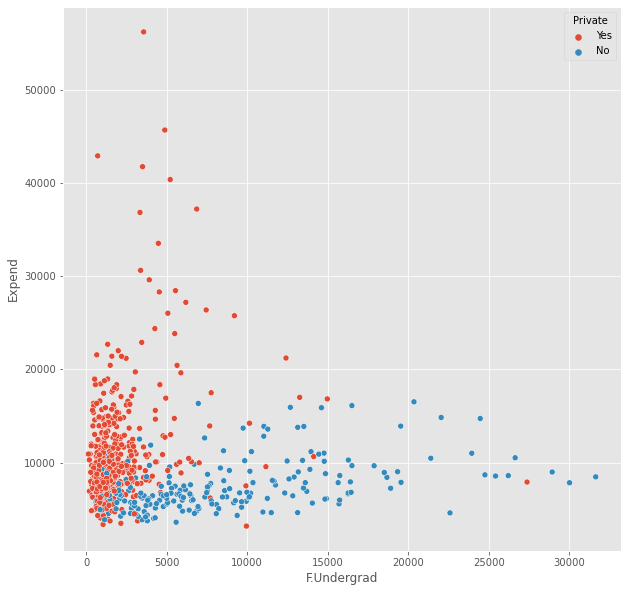

In [90]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='F.Undergrad', y='Expend', data=df, hue='Private')
# 0 = non private
# 1 =private

Plot data untuk jumlah biaya yang dikeluarkan oleh mahasiswa S1 full time di univ private dan non private. Terlihat bahwa jumlah biaya yang dikeluarkan mahasisw S1 full time lebih bayak di univ private daripada di univ non private.

<AxesSubplot:xlabel='F.Undergrad', ylabel='Grad.Rate'>

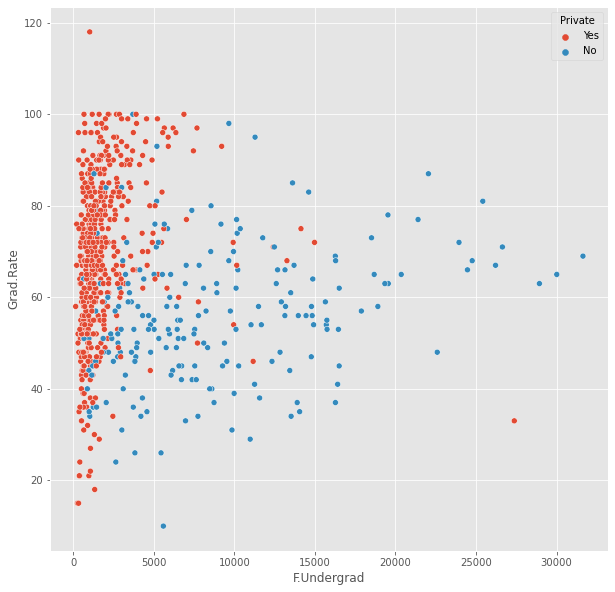

In [91]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='F.Undergrad', y='Grad.Rate', data=df, hue='Private')
# 0 = non private
# 1 =private

Dari data di atas dapat disimpulkan mahasiswa S1 full time di univ private jumlah mahasiswa yang lulus dengan grad rate tinggi terbilang rendah (sekitar 5000 mahasiswa). Pada univ non private tingkat grade rate nya bervariasi

In [92]:
df.rename(columns={'Unnamed: 0':'University'}, inplace=True)
#mengganti nama kolom Unnamed: 0 menjadi University

In [93]:
df.select_dtypes('object').head(3)
#menampilkan variabel yang datanya bertipe str

,University,Private
0,Abilene Christian University,Yes
1,Adelphi University,Yes
2,Adrian College,Yes


In [94]:
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,Adelphi University,Yes,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,Adrian College,Yes,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,Agnes Scott College,Yes,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,Alaska Pacific University,Yes,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197.0,1515.0,543.0,4.0,26.0,3089.0,2029.0,6797.0,3900.0,500.0,1200.0,60.0,60.0,21.0,14.0,4469.0,40.0
773,Xavier University,Yes,1959.0,1805.0,695.0,24.0,47.0,2849.0,1107.0,11520.0,4960.0,600.0,1250.0,73.0,75.0,13.3,31.0,9189.0,83.0
774,Xavier University of Louisiana,Yes,2097.0,1915.0,695.0,34.0,61.0,2793.0,166.0,6900.0,4200.0,617.0,781.0,67.0,75.0,14.4,20.0,8323.0,49.0
775,Yale University,Yes,10705.0,2453.0,1317.0,95.0,99.0,5217.0,83.0,19840.0,6510.0,630.0,2115.0,96.0,96.0,5.8,49.0,40386.0,99.0


In [95]:
df2 = df.copy().iloc[:, 2:] #slicing 2 kolom terakhir(dari index ke-3)
df2.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


# 1. K-means

### Elbow Method

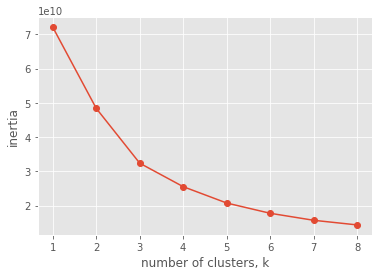

In [96]:
from sklearn.cluster import KMeans
ks = range(1, 9)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df2)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [97]:
inertia = []
for i in range(1, 9):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df2)
    inertia.append(model.inertia_)
inertia

[72040559613.94107,
 48356202264.49214,
 32365874599.91604,
 25519276300.92099,
 20748753332.074245,
 17759717880.33365,
 15716350097.17268,
 14371926732.910637]

Menentukan berapa cluster yang diambil dengan Elbow method. Dari grafik di atas jumlah cluster k yang diambil k=5 karena grafik mulai melandai di cluster 5

In [98]:
inertia_df2 = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1, 9)])
inertia_df2
#inertia k= 1-8

,Inertia
1,7.204056e+10
2,4.835620e+10
3,3.236587e+10
4,2.551928e+10
5,2.074875e+10
6,1.775972e+10
7,1.571635e+10
8,1.437193e+10


## Fitting Model KMeans

In [99]:
modelKM = KMeans(n_clusters=5, random_state=42)
modelKM.fit(df2)

KMeans(n_clusters=5, random_state=42)

In [100]:
modelKM.predict(df2)

array([0, 4, 0, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 3, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 1, 0, 0, 0, 0,
       4, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 4, 1, 4, 0, 4, 0,
       0, 0, 0, 2, 3, 4, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 3,
       0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 1, 1, 1, 0, 4, 4, 4, 0,
       0, 0, 0, 0, 4, 4, 0, 4, 1, 0, 4, 0, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 1, 4, 4, 1, 0, 0, 3, 0, 0, 0, 0, 4, 0, 4, 4, 0,
       0, 0, 0, 0, 3, 4, 0, 0, 4, 4, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 3, 4,
       1, 1, 0, 0, 0, 1, 0, 0, 4, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0,
       0, 0, 0, 1, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 4,
       0, 4, 1, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 4, 4, 1, 0, 0, 0, 4, 3, 4, 0, 0, 4, 4, 4, 1, 4, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 1, 4, 0, 0, 1, 2, 0, 0, 2, 4, 1, 1, 0, 0, 0, 3, 0,
       0, 4, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0,

Maksud hasil array di atas 0 untuk cluster ke-1; 1 untuk cluster ke-2 dst

In [101]:
df2['Cluster KM'] = modelKM.predict(df2)
df2
#menunjukkan baris ke sekian masuk ke cluster ke berapa
#cluster KM adalah cluster yang terbentuk dari KMeans method

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster KM
0,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0,0
1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0,4
2,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0,0
3,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0,4
4,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197.0,1515.0,543.0,4.0,26.0,3089.0,2029.0,6797.0,3900.0,500.0,1200.0,60.0,60.0,21.0,14.0,4469.0,40.0,0
773,1959.0,1805.0,695.0,24.0,47.0,2849.0,1107.0,11520.0,4960.0,600.0,1250.0,73.0,75.0,13.3,31.0,9189.0,83.0,0
774,2097.0,1915.0,695.0,34.0,61.0,2793.0,166.0,6900.0,4200.0,617.0,781.0,67.0,75.0,14.4,20.0,8323.0,49.0,0
775,10705.0,2453.0,1317.0,95.0,99.0,5217.0,83.0,19840.0,6510.0,630.0,2115.0,96.0,96.0,5.8,49.0,40386.0,99.0,3


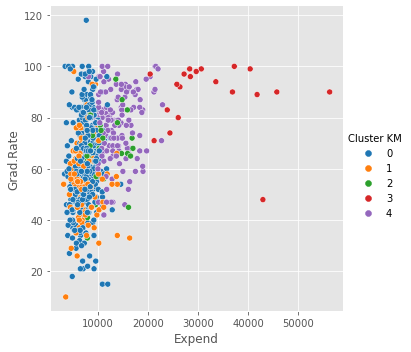

In [102]:
sns.relplot(x='Expend', y='Grad.Rate', data=df2, hue='Cluster KM', palette='tab10')

In [103]:
modelKM.cluster_centers_
#mencari center per cluster

array([[1.16847489e+03, 8.90497717e+02, 3.52691781e+02, 2.13127854e+01,
        4.85753425e+01, 1.48591781e+03, 4.97865297e+02, 9.19334247e+03,
        4.10503653e+03, 5.30547945e+02, 1.31097945e+03, 6.50525114e+01,
        7.26986301e+01, 1.43952055e+01, 2.12237443e+01, 7.64104795e+03,
        6.27146119e+01],
       [5.71527273e+03, 3.93313223e+03, 1.69971074e+03, 2.20165289e+01,
        5.31157025e+01, 9.05353719e+03, 2.22576860e+03, 6.88443802e+03,
        3.72834711e+03, 5.57983471e+02, 1.74140496e+03, 7.84710744e+01,
        8.46528926e+01, 1.72826446e+01, 1.43140496e+01, 7.38362810e+03,
        5.63223140e+01],
       [1.51104412e+04, 1.01255000e+04, 3.88338235e+03, 4.07058824e+01,
        7.36764706e+01, 1.98478235e+04, 3.60058824e+03, 9.22535294e+03,
        4.49376471e+03, 6.07500000e+02, 1.77235294e+03, 8.67058824e+01,
        9.17647059e+01, 1.59823529e+01, 1.76470588e+01, 1.08922353e+04,
        6.55882353e+01],
       [9.34175000e+03, 3.60625000e+03, 1.32195000e+03, 7.605

In [104]:
df2.var()

Apps           1.497846e+07
Accept         6.007960e+06
Enroll         8.633684e+05
Top10perc      3.111825e+02
Top25perc      3.922292e+02
F.Undergrad    2.352658e+07
P.Undergrad    2.317799e+06
Outstate       1.618466e+07
Room.Board     1.202743e+06
Books          2.725978e+04
Personal       4.584258e+05
PhD            2.666086e+02
Terminal       2.167478e+02
S.F.Ratio      1.566853e+01
perc.alumni    1.535567e+02
Expend         2.726687e+07
Grad.Rate      2.950737e+02
Cluster KM     2.586229e+00
dtype: float64

### Kmeans with scaling 

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [106]:
# Import the MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

# Create a scaling object
scaler = MinMaxScaler()

# Create a list of the variables that you need to scale
varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
# Scale these variables using 'fit_transform'
df2[varlist] = scaler.fit_transform(df2[varlist])

In [107]:
df2.var()

Apps           0.006498
Accept         0.008714
Enroll         0.021364
Top10perc      0.034480
Top25perc      0.047365
F.Undergrad    0.023704
P.Undergrad    0.004861
Outstate       0.043181
Room.Board     0.029885
Books          0.005413
Personal       0.010685
PhD            0.029541
Terminal       0.037526
S.F.Ratio      0.011262
perc.alumni    0.037489
Expend         0.009690
Grad.Rate      0.025298
Cluster KM     2.586229
dtype: float64

# 2. Hierarchical Clustering

In [108]:
df2

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster KM
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,0
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,4
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,0
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,4
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778,0
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926,0
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111,0
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074,3


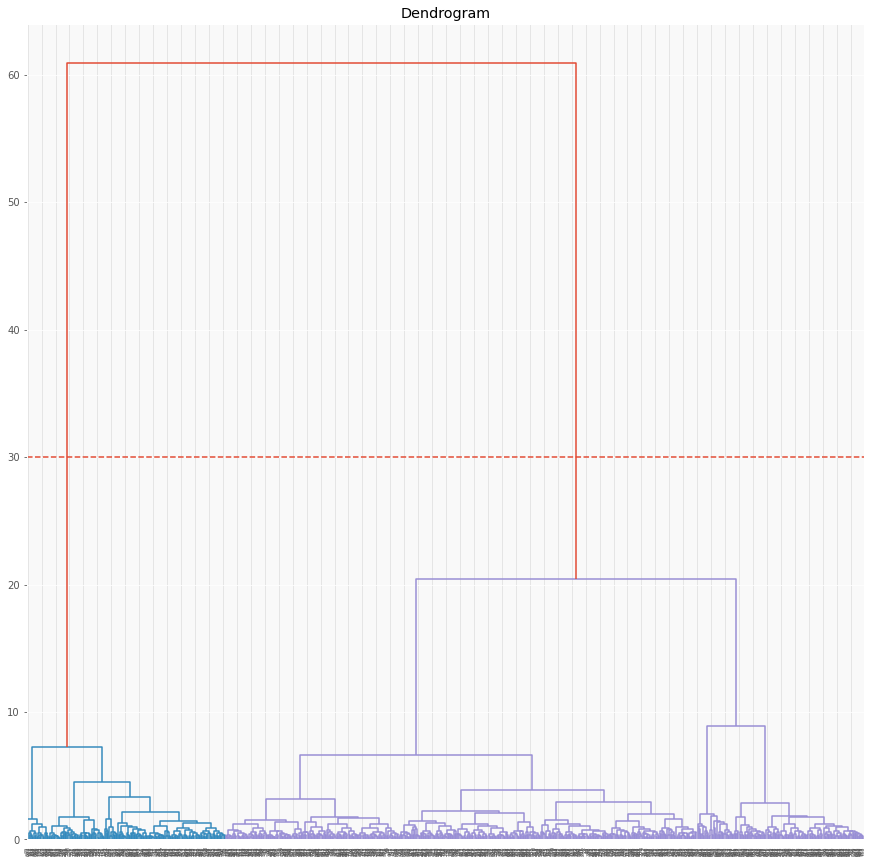

In [109]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 15))
plt.title('Dendrogram')
plt.axhline(y=30, linestyle='--')
dend = sch.dendrogram(sch.linkage(df2, method='ward'))
#ada 5 cluster maka threshold yang diambil 30

In [110]:
from sklearn.cluster import AgglomerativeClustering as AC

cluster = AC(n_clusters=5)
#di awal cluster ditentukan sebanyak 5

In [111]:
cluster.fit_predict(df2)

array([0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1,
       0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 3, 4, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 4,
       0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 4, 0, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 0, 4, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 2,
       1, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 2, 4, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 3, 0, 0, 3, 2, 1, 1, 0, 0, 0, 4, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

In [112]:
df2['Cluster AC'] = cluster.fit_predict(df2)
df2
#cluster AC adalah cluster yang terbentuk dengan metode agglomerative cluster

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster KM,Cluster AC
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,0,0
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,4,2
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,0,0
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,4,2
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0.044071,0.054955,0.079912,0.031579,0.186813,0.093639,0.092878,0.230217,0.334174,0.180036,0.145038,0.547368,0.473684,0.495979,0.218750,0.024186,0.277778,0,0
773,0.039114,0.065999,0.103823,0.242105,0.417582,0.086021,0.050653,0.474174,0.501261,0.224599,0.152672,0.684211,0.671053,0.289544,0.484375,0.113164,0.675926,0,0
774,0.041989,0.070188,0.103823,0.347368,0.571429,0.084243,0.007557,0.235537,0.381463,0.232175,0.081069,0.621053,0.671053,0.319035,0.312500,0.096839,0.361111,0,0
775,0.221273,0.090677,0.201667,0.989474,0.989011,0.161186,0.003755,0.903926,0.745586,0.237968,0.284733,0.926316,0.947368,0.088472,0.765625,0.701265,0.824074,3,4


In [113]:
df2['Cluster KM'].value_counts()

0    438
4    164
1    121
2     34
3     20
Name: Cluster KM, dtype: int64

In [114]:
df2['Cluster AC'].value_counts()

0    438
2    164
1    121
3     34
4     20
Name: Cluster AC, dtype: int64

#### Nilai Rata-rata kolom berdasarkan hasil Agglomeratif clustering

In [115]:
Hierarchical_summary = df2.groupby(['Cluster AC']).mean().reset_index()
Hierarchical_summary

,Cluster AC,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster KM
0,0,0.022650,0.031171,0.049975,0.213819,0.434894,0.042754,0.022755,0.353995,0.366494,0.193649,0.161982,0.600553,0.640771,0.318906,0.331621,0.083983,0.488098,0.0
1,1,0.117349,0.147046,0.261870,0.221227,0.484788,0.282965,0.101890,0.234733,0.307117,0.205875,0.227695,0.741801,0.798064,0.396318,0.223657,0.079130,0.428910,1.0
2,2,0.052712,0.063735,0.078347,0.407253,0.659073,0.062948,0.012861,0.690663,0.548914,0.214779,0.121382,0.792234,0.870668,0.239603,0.508479,0.198393,0.617209,4.0
3,3,0.313029,0.382874,0.605377,0.417957,0.710730,0.625597,0.164854,0.355648,0.427769,0.227941,0.232420,0.828483,0.891641,0.361457,0.275735,0.145272,0.514706,2.0
4,4,0.192880,0.134597,0.202446,0.790000,0.908791,0.163287,0.019519,0.815070,0.671934,0.214171,0.153519,0.897895,0.957895,0.110322,0.552344,0.549737,0.731019,3.0


## Evaluation Metric

In [116]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

siluet_km = silhouette_score(df2, df2['Cluster KM'])
siluet_ac = silhouette_score(df2, df2['Cluster AC'])

calinski_km = calinski_harabasz_score(df2, df2['Cluster KM'])
calinski_ac = calinski_harabasz_score(df2, df2['Cluster AC'])

dbi_km = davies_bouldin_score(df2, df2['Cluster KM'])
dbi_ac = davies_bouldin_score(df2, df2['Cluster AC'])

model_selection=pd.DataFrame({'K Means':[siluet_km, calinski_km, dbi_km], 
                              'Agglomerative': [siluet_ac, calinski_ac, dbi_ac]}, 
                              index=['Silhouette Score', 'Calinski-Harabasz', 'Davies-Bouldin'])

In [117]:
model_selection
#mencari nilai Silhouette Score, Calinski-Harabasz, Davies-Bouldin dengan n= 5

,K Means,Agglomerative
Silhouette Score,0.638914,0.638914
Calinski-Harabasz,3300.153129,3300.153129
Davies-Bouldin,0.521193,0.521193


Silhouette Score cukup bagus yang menandakan bahwa jarak antar cluster berjauhan. Davis Bouldin score juga cukup baik di bawah 1 yang menandakan kemiripan antar cluster tidak sama.

# 3. PCA

## Scaling

In [118]:
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,Adelphi University,Yes,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,Adrian College,Yes,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,Agnes Scott College,Yes,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,Alaska Pacific University,Yes,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197.0,1515.0,543.0,4.0,26.0,3089.0,2029.0,6797.0,3900.0,500.0,1200.0,60.0,60.0,21.0,14.0,4469.0,40.0
773,Xavier University,Yes,1959.0,1805.0,695.0,24.0,47.0,2849.0,1107.0,11520.0,4960.0,600.0,1250.0,73.0,75.0,13.3,31.0,9189.0,83.0
774,Xavier University of Louisiana,Yes,2097.0,1915.0,695.0,34.0,61.0,2793.0,166.0,6900.0,4200.0,617.0,781.0,67.0,75.0,14.4,20.0,8323.0,49.0
775,Yale University,Yes,10705.0,2453.0,1317.0,95.0,99.0,5217.0,83.0,19840.0,6510.0,630.0,2115.0,96.0,96.0,5.8,49.0,40386.0,99.0


In [119]:
#label encode
from sklearn.preprocessing import LabelEncoder

lE = LabelEncoder()

df['Private'] = lE.fit_transform(df['Private'])

Encoding kolom Private dari Yes = 1 dan No = 0

In [120]:
df

,University,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,Adelphi University,1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,Adrian College,1,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,Agnes Scott College,1,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,Alaska Pacific University,1,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,0,2197.0,1515.0,543.0,4.0,26.0,3089.0,2029.0,6797.0,3900.0,500.0,1200.0,60.0,60.0,21.0,14.0,4469.0,40.0
773,Xavier University,1,1959.0,1805.0,695.0,24.0,47.0,2849.0,1107.0,11520.0,4960.0,600.0,1250.0,73.0,75.0,13.3,31.0,9189.0,83.0
774,Xavier University of Louisiana,1,2097.0,1915.0,695.0,34.0,61.0,2793.0,166.0,6900.0,4200.0,617.0,781.0,67.0,75.0,14.4,20.0,8323.0,49.0
775,Yale University,1,10705.0,2453.0,1317.0,95.0,99.0,5217.0,83.0,19840.0,6510.0,630.0,2115.0,96.0,96.0,5.8,49.0,40386.0,99.0


In [121]:
# Import the RobustScaler()
from sklearn.preprocessing import RobustScaler

# Create a scaling object
scaler = RobustScaler()

# Create a list of the variables that you need to scale
varlist = ['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
# Scale these variables using 'fit_transform'
df[varlist] = scaler.fit_transform(df[varlist])

Menggunakan robust scaler karena outlier pada dataset tidak dibuang dan setelah dibandingkan dengan scaler lainnya, hasil dari robust scaler (persentase variance) paling baik

scaling kolom yang ada pada list varlist agar rentang nilai pada kolom tersebut tidak terlalu jauh

In [122]:
# Putting feature variable to X
X = df.drop(['University'],axis=1)

# Putting Private
Universitas= df['University']

In [123]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [124]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42)

### PCA Component or Weight 

In [125]:
pca.components_

array([[-0.08734515,  0.40319219,  0.41537289,  0.44726788,  0.05730373,
         0.05799759,  0.51322797,  0.3882223 , -0.03229198,  0.00542084,
         0.06719517,  0.08508059,  0.09061716,  0.08498743,  0.06172418,
        -0.04889342,  0.04386318, -0.00848164],
       [ 0.08680263,  0.17150758,  0.07936678,  0.00568621,  0.35455134,
         0.25365405, -0.05058842, -0.32056819,  0.2903134 ,  0.22780222,
         0.08116249, -0.10525632,  0.18705404,  0.18730476, -0.23951762,
         0.20377001,  0.53967789,  0.21746604],
       [ 0.0362787 , -0.18701162, -0.23017621, -0.19720662,  0.04819532,
         0.02223407, -0.16150874,  0.76631345,  0.0882069 ,  0.12865162,
         0.35664606,  0.09859756,  0.05725395,  0.07827952, -0.13798245,
         0.02506828,  0.25170483, -0.04496964],
       [-0.00688584,  0.03645141,  0.04159216,  0.0385967 , -0.03078922,
        -0.02211299,  0.03364355, -0.32524558, -0.07449293, -0.02629383,
         0.90939171,  0.1263063 , -0.10425945, -0.065

In [126]:
pca.components_[0] #PCA1

array([-0.08734515,  0.40319219,  0.41537289,  0.44726788,  0.05730373,
        0.05799759,  0.51322797,  0.3882223 , -0.03229198,  0.00542084,
        0.06719517,  0.08508059,  0.09061716,  0.08498743,  0.06172418,
       -0.04889342,  0.04386318, -0.00848164])

In [127]:
pca.components_[1] #PCA2

array([ 0.08680263,  0.17150758,  0.07936678,  0.00568621,  0.35455134,
        0.25365405, -0.05058842, -0.32056819,  0.2903134 ,  0.22780222,
        0.08116249, -0.10525632,  0.18705404,  0.18730476, -0.23951762,
        0.20377001,  0.53967789,  0.21746604])

In [128]:
pca.components_[2] #PCA3

array([ 0.0362787 , -0.18701162, -0.23017621, -0.19720662,  0.04819532,
        0.02223407, -0.16150874,  0.76631345,  0.0882069 ,  0.12865162,
        0.35664606,  0.09859756,  0.05725395,  0.07827952, -0.13798245,
        0.02506828,  0.25170483, -0.04496964])

In [129]:
pca.components_[3] #PCA4

array([-0.00688584,  0.03645141,  0.04159216,  0.0385967 , -0.03078922,
       -0.02211299,  0.03364355, -0.32524558, -0.07449293, -0.02629383,
        0.90939171,  0.1263063 , -0.10425945, -0.0659253 ,  0.05736062,
       -0.08003221, -0.1061664 , -0.04099669])

In [130]:
pca.components_[4] #PCA5

array([ 0.07314524,  0.1885538 ,  0.14661713,  0.00463681, -0.26996605,
       -0.32753349, -0.05833285, -0.04407914,  0.01909859,  0.05879846,
       -0.08538033,  0.16945938, -0.40373312, -0.38438832, -0.34192895,
       -0.17719359,  0.47384783, -0.16925059])

In [131]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3], 'PC5':pca.components_[4], 'Feature':colnames})
pcs_df
#mereduksi variabel jadi 6 PC dari 17 PC

,PC1,PC2,PC3,PC4,PC5,Feature
0,-0.087345,0.086803,0.036279,-0.006886,0.073145,Private
1,0.403192,0.171508,-0.187012,0.036451,0.188554,Apps
2,0.415373,0.079367,-0.230176,0.041592,0.146617,Accept
3,0.447268,0.005686,-0.197207,0.038597,0.004637,Enroll
4,0.057304,0.354551,0.048195,-0.030789,-0.269966,Top10perc
5,0.057998,0.253654,0.022234,-0.022113,-0.327533,Top25perc
6,0.513228,-0.050588,-0.161509,0.033644,-0.058333,F.Undergrad
7,0.388222,-0.320568,0.766313,-0.325246,-0.044079,P.Undergrad
8,-0.032292,0.290313,0.088207,-0.074493,0.019099,Outstate
9,0.005421,0.227802,0.128652,-0.026294,0.058798,Room.Board


### Choose Number of PC

In [132]:
#Eigenvalue dari tiap PC
pca.explained_variance_

array([9.07205655, 4.05804669, 1.82495928, 1.56620498, 0.69483808,
       0.65381067, 0.46612793, 0.40434097, 0.3588983 , 0.283151  ,
       0.26962672, 0.20051521, 0.13631126, 0.07584863, 0.07290649,
       0.06262213, 0.05970032, 0.03860511])

In [133]:
#Proportion: Berapa persen tiap PC menjelaskan varians dari data
pca.explained_variance_ratio_

array([0.44693081, 0.19991786, 0.0899058 , 0.07715839, 0.03423089,
       0.03220969, 0.02296358, 0.01991968, 0.01768096, 0.01394931,
       0.01328304, 0.00987829, 0.00671531, 0.00373665, 0.00359171,
       0.00308505, 0.00294111, 0.00190186])

PC 1 = 44.7%, PC 2 = 20%, PC 3 = 9% dst

Text(0, 0.5, 'cumulative explained variance')

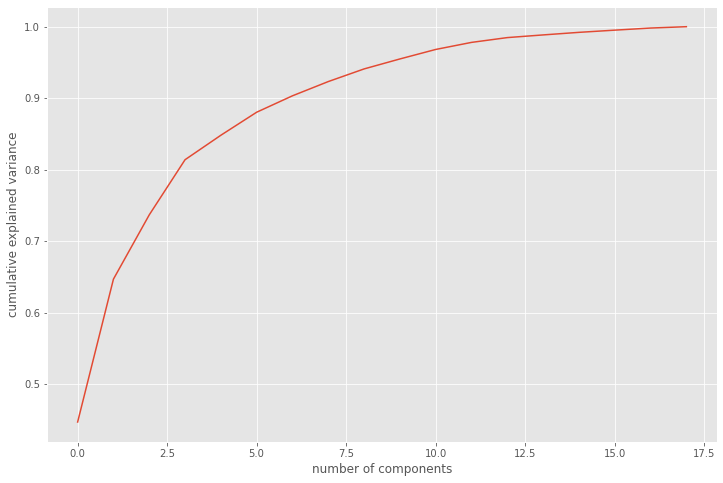

In [134]:
#Making the screeplot - plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Dipilihlah 5 komponen dengan metode PCA karena variance mencapai sekitar 88%

In [135]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final= PCA(n_components=5,random_state=42)
#memakai 5 PC

In [136]:
df_pca = pca_final.fit_transform(X)

In [137]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4
0,-0.651749,-1.310734,-0.639130,-0.241017,-0.169172
1,-0.687677,-0.822105,1.089948,1.578775,2.454305
2,-1.851365,-0.433335,-0.742164,-0.745294,0.688291
3,-1.917958,3.268445,0.869656,-1.256201,-0.218321
4,-1.776254,-0.985440,1.627056,1.805934,0.810456


<AxesSubplot:>

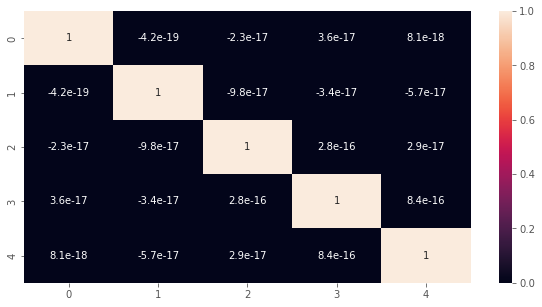

In [138]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(df_pca.corr(),annot = True)

Dari correlation matrix di atas didapatkan bahwa tiap PCA memiliki sedikit korelasi atau hampir tidak ada.